# Graybox Attack Analysis
Analysis of adversarial prompts sent to DALL-E-3/ChatGPT.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from information_theory import remove_outliers_iqr
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

sns.set_theme()
palette = sns.color_palette()
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
sns.set_theme(context="paper", font_scale=1.5)

In [17]:
df = (
    pd.read_csv('../../datasets/graybox/graybox_attack_stats.csv')
)
df_orig = df.copy()

# Attack Analysis

In [18]:
df_orig['response_type'].value_counts()

response_type
chatgpt-reject          39
dalle-issue             24
success                 23
dalle-content-policy    19
dalle-rate-limit         4
Name: count, dtype: int64

109
Removed 1 outliers from column 'total_time'
Removed 2 outliers from column 'total_time'
issue generation=20 policy violation=17 rate limit=4
2.694286525249481


/tmp/ipykernel_831239/3784706501.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df
/tmp/ipykernel_831239/3784706501.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df
/tmp/ipykernel_831239/3784706501.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df


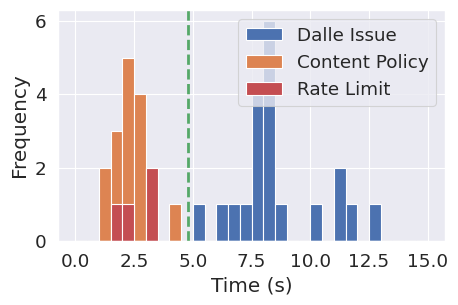

In [15]:
print(len(df))

stats = [
    "dalle_tool_time",
    "total_time",
]
stat = stats[1]
model = "gpt-4o"

rate_limit = (
    df
    [df["response_type"] == "dalle-rate-limit"]
    [df["model_slug"] == model]
    # .pipe(remove_outliers_iqr, stat)
    [stat]
)
issues = (
    df
    [df["response_type"] == "dalle-issue"]
    [df["model_slug"] == model]
    .pipe(remove_outliers_iqr, stat)
    [stat]
)
policy = (
    df
    [df["response_type"] == "dalle-content-policy"]
    [df["model_slug"] == model]
    .pipe(remove_outliers_iqr, stat)
    [stat]
)

print(f'issue generation={len(issues)} policy violation={len(policy)} rate limit={len(rate_limit)}')
print(rate_limit.mean())
# print(issues.describe())
# print(policy.describe())

fig, ax = plt.subplots(figsize=(5,3))

fixed_range = (0, 15)
ax.hist(issues, bins=30, label="Dalle Issue", color=palette[0], range=fixed_range)
ax.hist(policy, bins=30, label="Content Policy", color=palette[1], range=fixed_range)
ax.hist(rate_limit, bins=30, label="Rate Limit", color=palette[3], range=fixed_range)
ax.axvline(x=4.8, color=palette[2], linestyle="--", linewidth=2)

ax.set_xlabel("Time (s)")
ax.set_ylabel("Frequency")

ax.legend()

plt.show()